In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('creditcardfraud.csv')

In [3]:
data.head(20)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0.0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0.0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0.0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0.0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0.0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             116581 non-null  int64  
 1   trans_date_trans_time  116581 non-null  object 
 2   cc_num                 116581 non-null  int64  
 3   merchant               116581 non-null  object 
 4   category               116581 non-null  object 
 5   amt                    116581 non-null  float64
 6   first                  116581 non-null  object 
 7   last                   116581 non-null  object 
 8   gender                 116581 non-null  object 
 9   street                 116581 non-null  object 
 10  city                   116581 non-null  object 
 11  state                  116581 non-null  object 
 12  zip                    116581 non-null  int64  
 13  lat                    116581 non-null  float64
 14  long                   116581 non-nu

In [5]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,116581.000000,1.165810e+05,116581.000000,116581.000000,116581.000000,116581.000000,1.165810e+05,1.165810e+05,116581.000000,116580.000000,116580.000000
mean,58290.000000,4.165378e+17,69.234488,48858.086747,38.537690,-90.228378,8.903722e+04,1.373545e+09,38.536706,-90.228688,0.003903
std,33654.180203,1.308106e+18,153.223983,26852.484769,5.064669,13.714231,3.023774e+05,1.019597e+06,5.101053,13.728633,0.062351
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.042320,-166.671575,0.000000
25%,29145.000000,1.800429e+14,9.630000,26292.000000,34.668900,-96.809400,7.430000e+02,1.372620e+09,34.753584,-96.916375,0.000000
50%,58290.000000,3.519233e+15,47.310000,48174.000000,39.371600,-87.476900,2.408000e+03,1.373571e+09,39.370599,-87.444356,0.000000
75%,87435.000000,4.634956e+15,82.940000,72042.000000,41.940400,-80.175200,2.032800e+04,1.374403e+09,41.959262,-80.271824,0.000000
max,116580.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.375349e+09,66.669356,-66.952352,1.000000


In [6]:
# Handle missing values

data = data.dropna()
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116575,116575,2020-08-01 09:23:11,567868110212,"fraud_Herman, Treutel and Dickens",misc_net,1109.38,Dawn,Tucker,F,789 Herring Manors,...,29.7736,-95.4034,2906700,"Copywriter, advertising",1984-12-16,3a7673ae63f0e9f7934ac2815eec4d29,1375348991,29.387022,-95.272420,0.0
116576,116576,2020-08-01 09:23:35,3573030041201292,fraud_Berge LLC,gas_transport,49.54,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,94eec015cc2f5c128c601acc2ab126a0,1375349015,39.589891,-110.446512,0.0
116577,116577,2020-08-01 09:24:16,213178765398315,fraud_Vandervort-Funk,grocery_pos,34.56,Alan,Colon,M,748 Bryan Fields Suite 935,...,43.0351,-108.2024,19408,"Lecturer, higher education",1993-09-11,e20c800ef7ca2fbd4b073a3d2e20f734,1375349056,42.158232,-107.825127,0.0
116578,116578,2020-08-01 09:24:20,4390966588600992777,fraud_Dach-Nader,misc_net,21.39,Kyle,Simmons,M,8149 Harris Divide,...,35.6174,-97.5583,640470,Advertising copywriter,1966-06-24,f2f14042c8df81beb18002597f5d4163,1375349060,35.759467,-97.848306,0.0


In [7]:
# Remove duplicats data

data = data.drop_duplicates()
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116575,116575,2020-08-01 09:23:11,567868110212,"fraud_Herman, Treutel and Dickens",misc_net,1109.38,Dawn,Tucker,F,789 Herring Manors,...,29.7736,-95.4034,2906700,"Copywriter, advertising",1984-12-16,3a7673ae63f0e9f7934ac2815eec4d29,1375348991,29.387022,-95.272420,0.0
116576,116576,2020-08-01 09:23:35,3573030041201292,fraud_Berge LLC,gas_transport,49.54,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,94eec015cc2f5c128c601acc2ab126a0,1375349015,39.589891,-110.446512,0.0
116577,116577,2020-08-01 09:24:16,213178765398315,fraud_Vandervort-Funk,grocery_pos,34.56,Alan,Colon,M,748 Bryan Fields Suite 935,...,43.0351,-108.2024,19408,"Lecturer, higher education",1993-09-11,e20c800ef7ca2fbd4b073a3d2e20f734,1375349056,42.158232,-107.825127,0.0
116578,116578,2020-08-01 09:24:20,4390966588600992777,fraud_Dach-Nader,misc_net,21.39,Kyle,Simmons,M,8149 Harris Divide,...,35.6174,-97.5583,640470,Advertising copywriter,1966-06-24,f2f14042c8df81beb18002597f5d4163,1375349060,35.759467,-97.848306,0.0


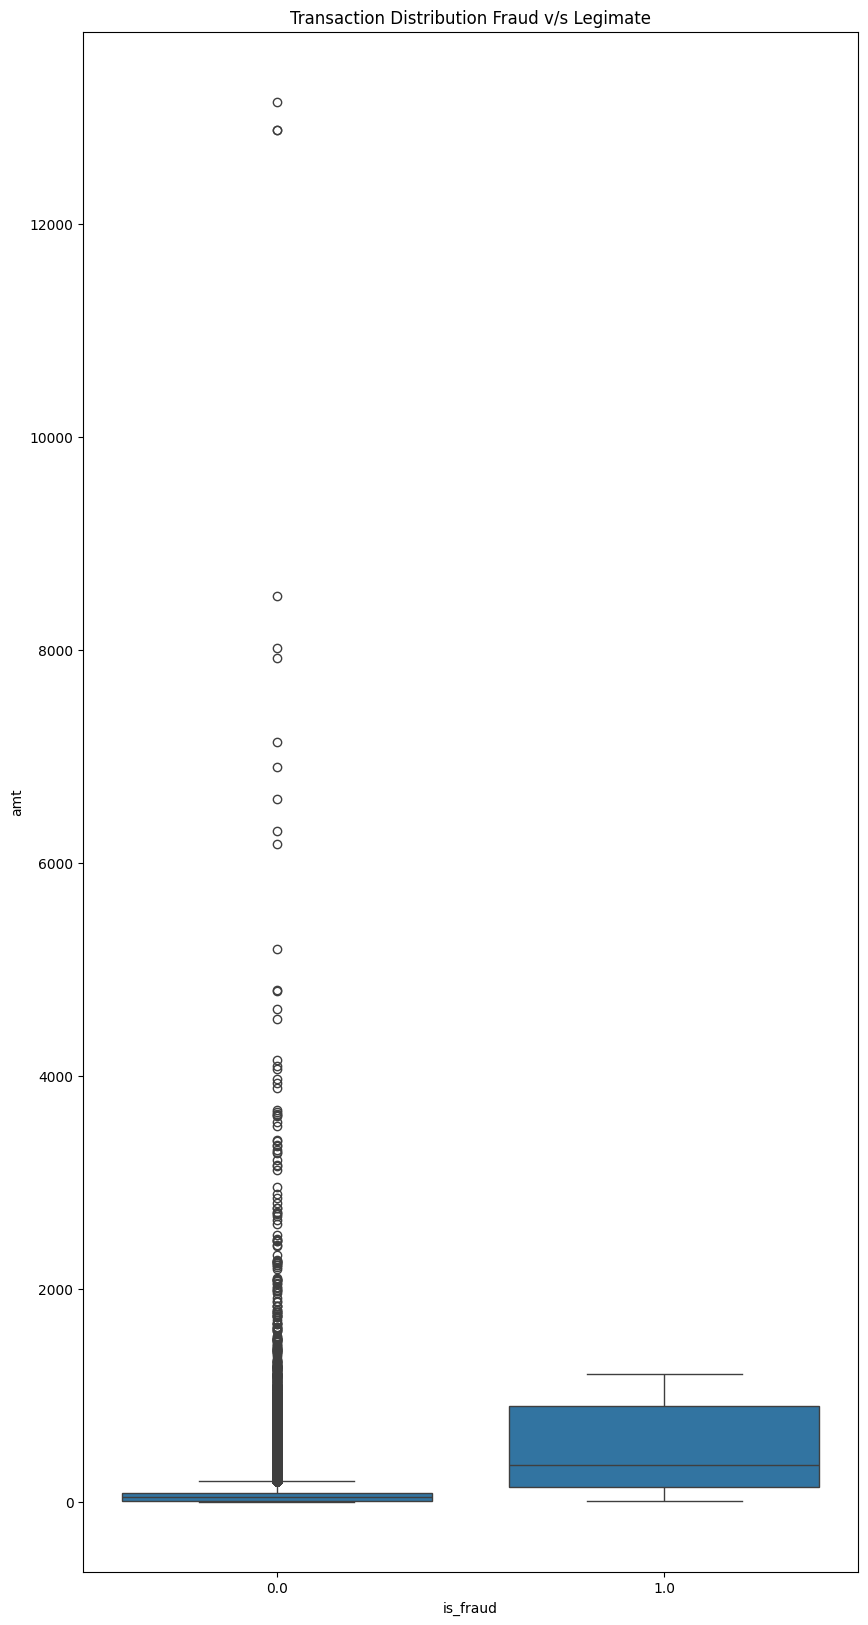

In [9]:
# Data Visualization

# flag0  ---> Legimate
# flag1  ---> Fraudanat

plt.figure(figsize=(10,20))
sns.boxplot(y='amt',x='is_fraud',data=data)
plt.title('Transaction Distribution Fraud v/s Legimate')
plt.xlabel('is_fraud')
plt.ylabel('amt')
plt.show()

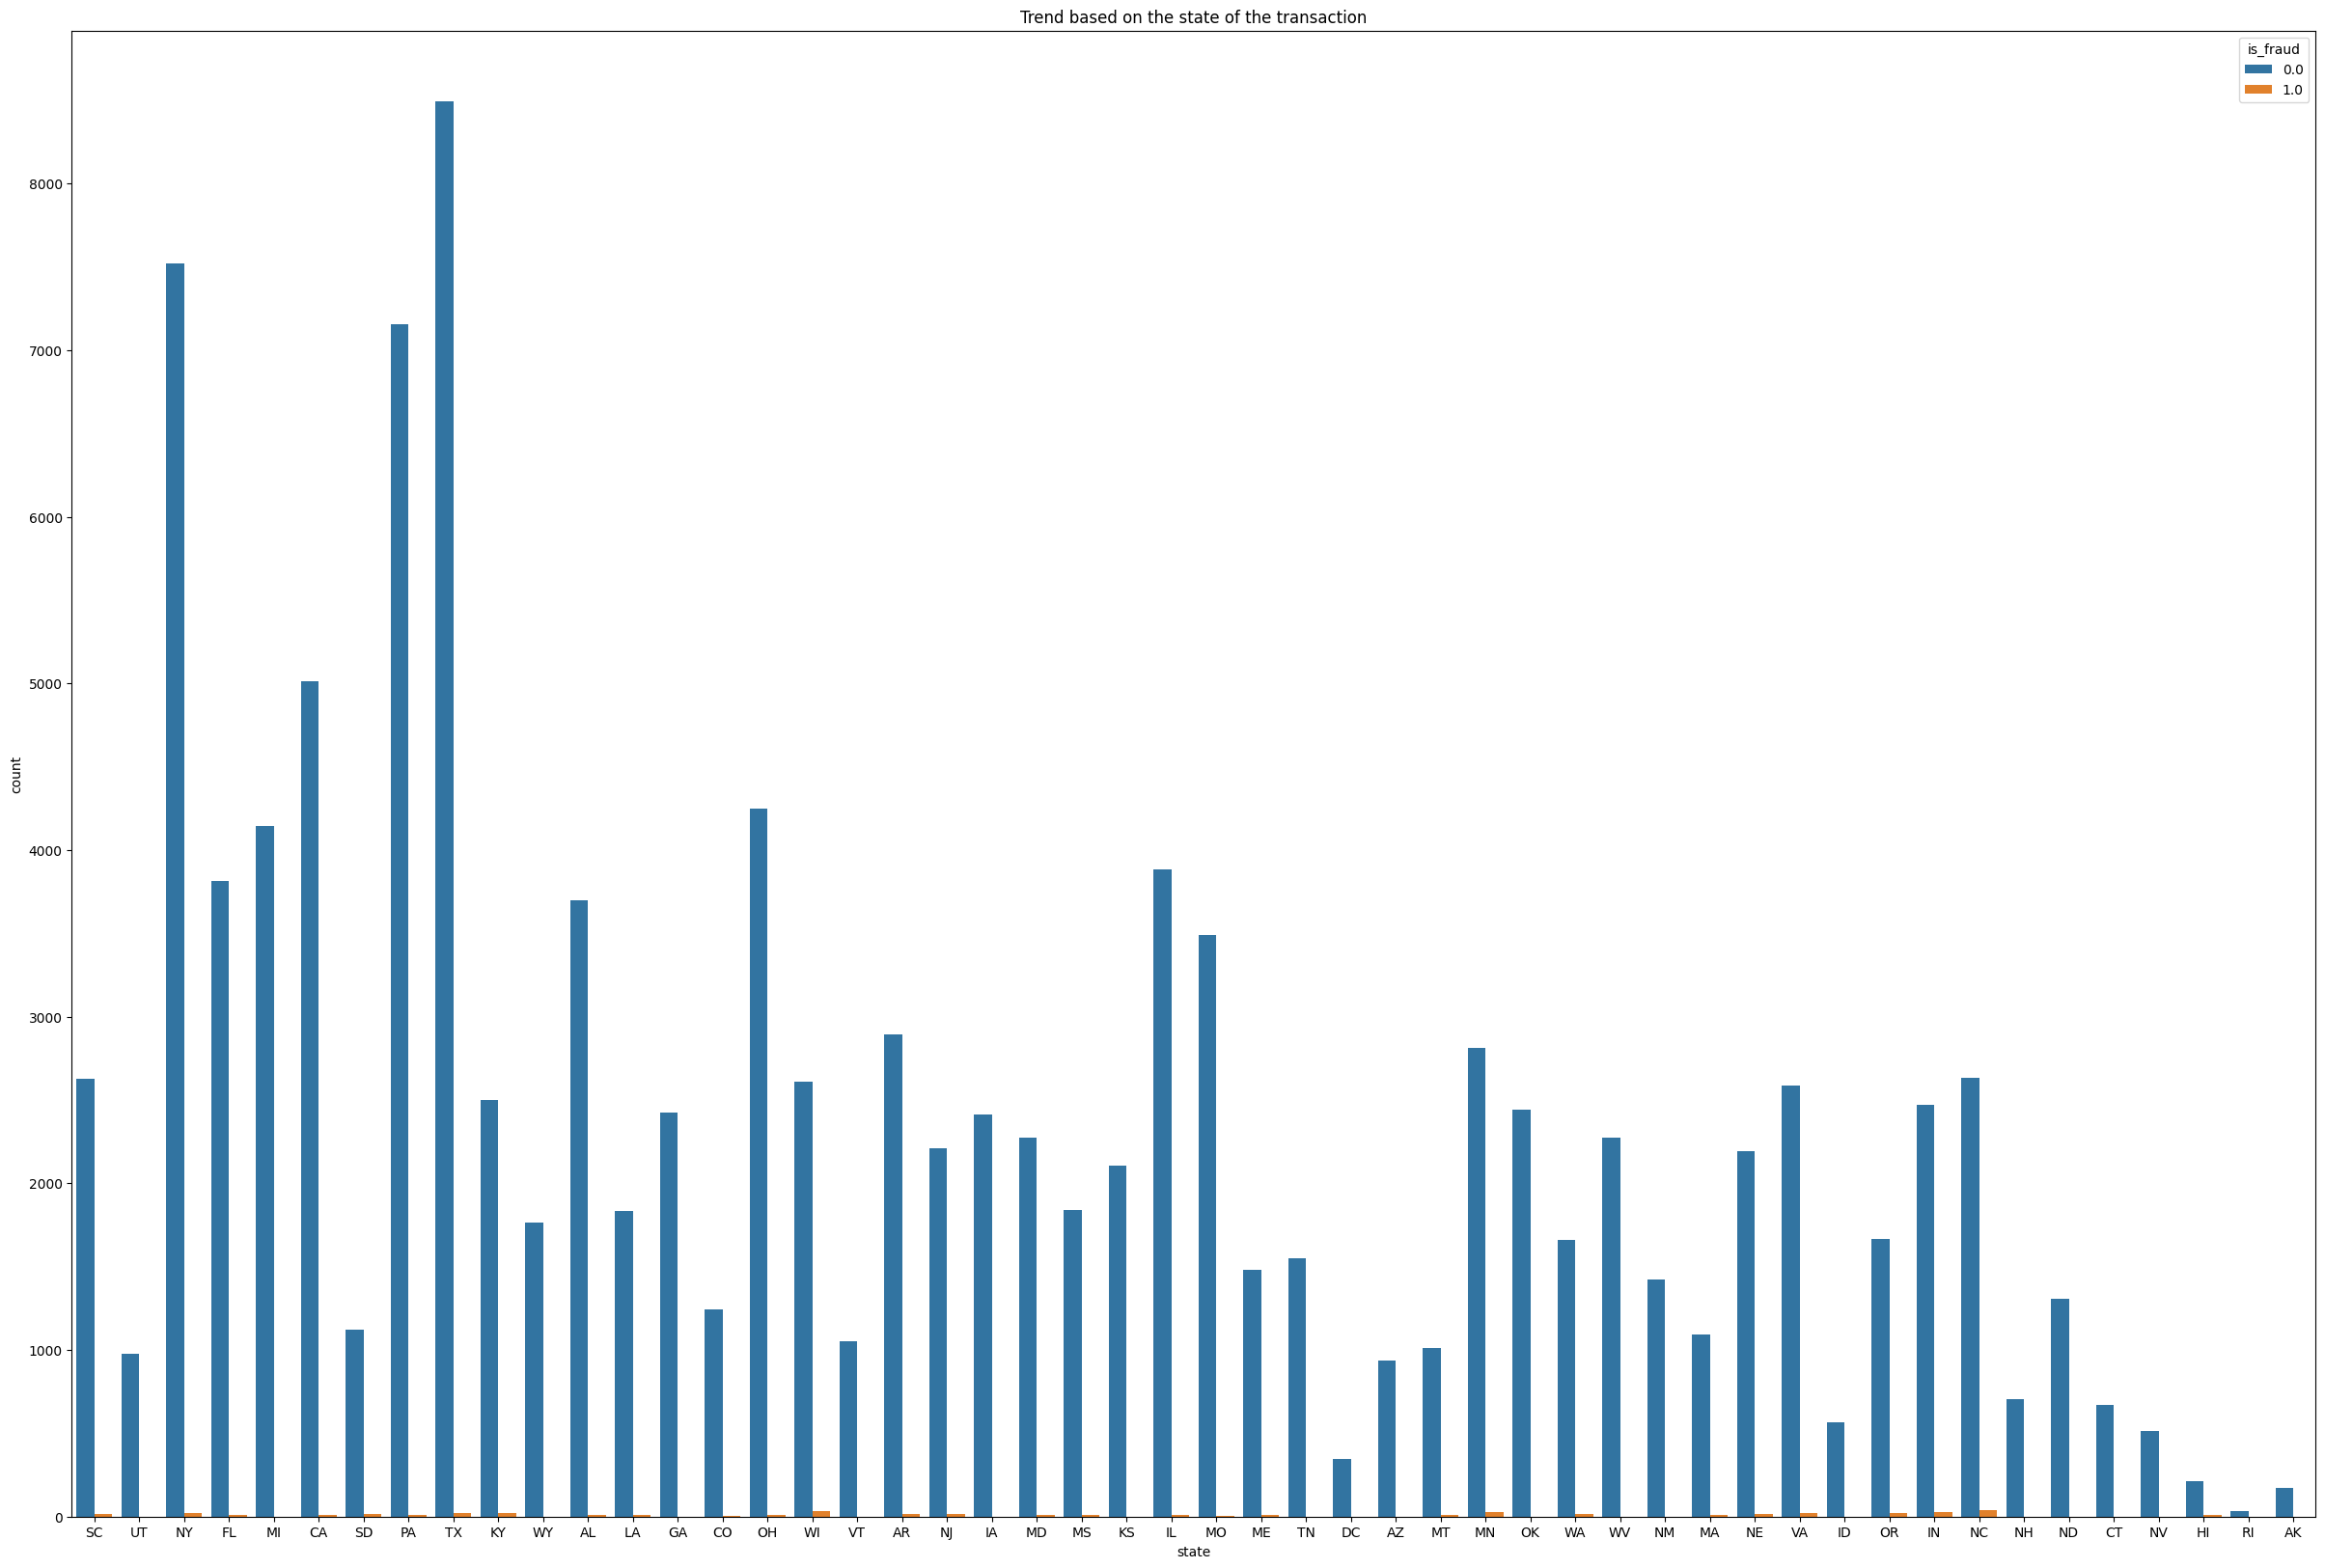

In [12]:
# Count Plot

plt.figure(figsize=(30,20))
sns.countplot(x='state',data=data,hue='is_fraud')
plt.title('Trend based on the state of the transaction')
plt.show()

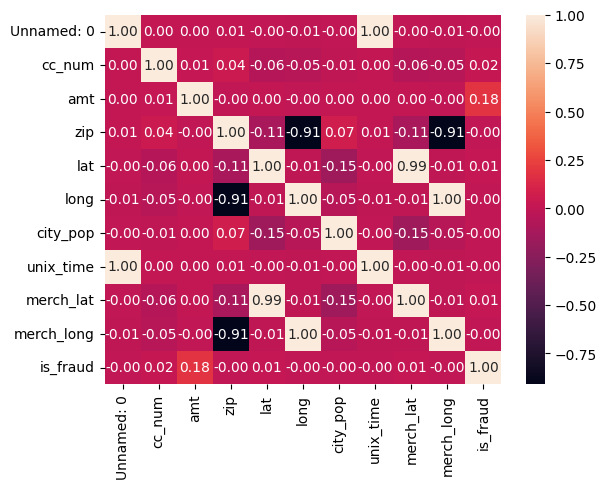

In [13]:
# Visualizing the correlation between different features using HeatMap

correlation = data.corr(numeric_only=True)
sns.heatmap(data=correlation,annot=True,fmt='.2f')
plt.show()

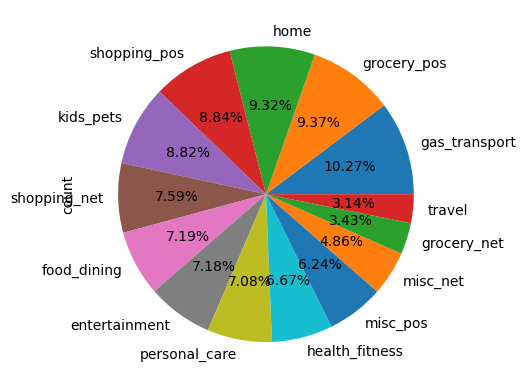

In [15]:
# Piechart

data['category'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()
